In [2]:
! pip install diffprivlib

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("cancer.csv")

DATA ANALYSIS AND PREPROCESSING 

In [5]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
dataset.shape

(569, 33)

In [7]:
dataset = dataset.drop(["Unnamed: 32"], axis = 1)

In [8]:
M = dataset[dataset.diagnosis == "M"]

In [9]:
B = dataset[dataset.diagnosis == "B"]

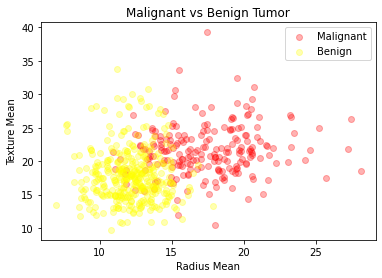

In [10]:
plt.title("Malignant vs Benign Tumor")
plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.scatter(M.radius_mean, M.texture_mean, color = "red", label = "Malignant", alpha = 0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = "yellow", label = "Benign", alpha = 0.3)
plt.legend()
plt.show()

In [11]:
dataset.diagnosis = [1 if i== "M" else 0 for i in dataset.diagnosis]

In [12]:
x = dataset.drop(["diagnosis"], axis = 1)
y = dataset.diagnosis.values

In [13]:
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [15]:
X=X_train


In [16]:
X


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,0.000945,0.319892,0.277308,0.306337,0.187275,0.242033,0.136127,0.067502,0.066054,0.208586,...,0.263607,0.278252,0.232980,0.132889,0.171300,0.150488,0.124920,0.206838,0.154741,0.099042
124,0.000940,0.302381,0.225905,0.292378,0.173913,0.167193,0.165235,0.189597,0.139165,0.182828,...,0.225187,0.285981,0.207082,0.109836,0.206894,0.219082,0.264217,0.308522,0.095210,0.139315
421,0.000985,0.364854,0.144403,0.376132,0.217434,0.455629,0.503711,0.339738,0.313121,0.518182,...,0.303451,0.168443,0.317197,0.153362,0.396421,0.326193,0.257109,0.380756,0.248768,0.242949
195,0.000952,0.280610,0.223876,0.267708,0.158176,0.241762,0.105147,0.090745,0.118141,0.388384,...,0.211668,0.265991,0.201205,0.102094,0.254441,0.119636,0.140895,0.282990,0.287601,0.094779
545,0.001003,0.314213,0.457220,0.299910,0.182269,0.359574,0.147506,0.069681,0.121421,0.305051,...,0.263963,0.454957,0.234922,0.133848,0.333025,0.120703,0.083786,0.246529,0.212300,0.095041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.000934,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,0.000938,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,0.009768,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,0.000987,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


DEFINING MINIMUM VALUES LIST AND MAXIMUM VALUES LIST FOR BOUNDS

In [17]:
list_min=[]
list_max=[]
for i in range (0,31):
    list_min.append(min(X.iloc[:,i].values))
    list_max.append(max(X.iloc[:,i].values))

In [18]:

list_min = [round(num, 7) for num in list_min]
list_max=[round(num, 7) for num in list_max]

DEFINING THE CLASSIFICATION ALGORITHM FROM DIFFERENTIAL PRIVACY LIBRARY

In [19]:
from diffprivlib.models import GaussianNB

clf = GaussianNB()
fit=clf.fit(X_train, y_train)

C:\Users\Anupama\anaconda3\lib\site-packages\diffprivlib\models\naive_bayes.py:99: PrivacyLeakWarning: Bounds have not been specified and will be calculated on the data provided. This will result in additional privacy leakage. To ensure differential privacy and no additional privacy leakage, specify bounds for each dimension.
  warnings.warn("Bounds have not been specified and will be calculated on the data provided. This will "


In [20]:
from diffprivlib.models import GaussianNB

clf = GaussianNB(bounds=(list_min,list_max),epsilon=10)
fit=clf.fit(X_train, y_train)

In [21]:
print("Test accuracy: %.2f%%"%(clf.score(X_test, y_test)*100))

Test accuracy: 86.55%


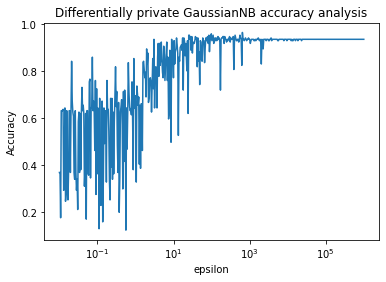

In [22]:
import numpy as np
import matplotlib.pyplot as plt

epsilons = np.logspace(-2, 6, 500)
bounds = (list_min,list_max)
accuracy = list()

for epsilon in epsilons:
    clf = GaussianNB(bounds=bounds, epsilon=epsilon)
    clf.fit(X_train, y_train)
    
    accuracy.append(clf.score(X_test, y_test))

plt.semilogx(epsilons, accuracy)
plt.title("Differentially private GaussianNB accuracy analysis")
plt.xlabel("epsilon")
plt.ylabel("Accuracy")
plt.show()